# TICKET CANCELLATION

### ***Objective:***

The goal of this project is to develop a machine learning model capable of accurately predicting flight ticket cancellations based on various factors. By anticipating cancellations, airlines can implement proactive strategies to minimize losses and improve customer satisfaction.

### ***Methodology:***

* **Data Acquisition:** Collect relevant flight data, including information such as departure time, reservation status, passenger    demographics, ticket price, and cancellation status.
* **Data Preprocessing:** Clean and prepare the data by handling missing values, addressing outliers, and converting data types as needed.
* **Model Selection:** Choose appropriate machine learning algorithms for classification, such as Random Forest, Decision Trees, KNN, XGBClassifier
* **Model Training:** Train the selected models on the prepared dataset, using appropriate training techniques and hyperparameter tuning.
* **Model Evaluation:** Evaluate the performance of the trained models using relevant metrics like accuracy, confusion matrix.
* **Model Deployment:** Deploy the best-performing model in a real-time environment to enable proactive cancellation predictions.


### ***Expected Outcomes:***

* A well-trained machine learning model capable of accurately predicting flight ticket cancellations.
* Insights into the factors that influence cancellation decisions, allowing airlines to implement targeted strategies.
* Improved operational efficiency and reduced financial losses for airlines.

# About DataSet

The dataset encompasses diverse information concerning passengers who have registered for a journey via a travel booking website. Here is an overview of the dataset columns:

- **Created:** Timestamp indicating the time of ticket registration.
- **CancelTime:** Timestamp indicating the time of ticket cancellation, if applicable.
- **DepartureTime:** Scheduled departure time for the trip.
- **BillID:** Unique identifier for the purchase transaction.
- **TicketID:** Unique identifier for the ticket.
- **ReserveStatus:** Payment status of the customer.
- **UserID:** Unique identifier for the user.
- **Male:** Indicates whether the ticket is associated with a male passenger.
- **Price:** Ticket price without any discounts.
- **CouponDiscount:** Discount applied by the passenger on the ticket.
- **From:** Origin of the trip.
- **To:** Destination of the trip.
- **Domestic:** Indicates whether the trip is domestic or international.
- **VehicleType:** Specifies details about the mode of transportation.
- **VehicleClass:** Indicates whether the vehicle is classified as first class.
- **Vehicle:** Specifies the type of vehicle.
- **Cancel:** Indicates whether the ticket has been canceled.
- **HashPassportNumber_p:** Hashed version of the passport number.
- **HashEmail:** Hashed version of the email address.
- **BuyerMobile:** Hashed version of the buyer's mobile number.
- **NationalCode:** Hashed version of the national identification number.
- **TripReason:** The reason for the trip.

This dataset offers valuable insights into passenger travel trends, booking tendencies, and trip cancellations. Such information can be leveraged for diverse analyses and predictions within the travel industry.

#  Importing Libary

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

/kaggle/input/classification-of-travel-purpose/train_data.csv


# Importing Data from Dataset

In [4]:
df = pd.read_csv("/kaggle/input/classification-of-travel-purpose/train_data.csv")
df.head(10)

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,...,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-10-23 09:38:49.110,NaN,2022-11-02 23:59:00,39710203,1091777.0,5,122885.0,True,6600000.0,34425.0,...,1,NaN,False,Work,Plane,0,NaN,66c7f29e3b92f3b77e20830ac29e7758037a53d2238a5b...,764974891906,477368495
1,2022-08-15 14:51:43.160,NaN,2022-08-18 04:15:00,38689463,1070902.0,5,876925.0,True,9500000.0,0.0,...,1,NaN,False,Int,Plane,0,NaN,b24634843858a4175d03422aa9e7211ec3b9f3ce4c481c...,27479149496,15987669
2,2022-09-20 17:25:27.250,NaN,2022-09-21 11:00:00,39245173,7624237.0,3,916640.0,False,2000000.0,0.0,...,1,VIP 2+1,True,Work,Bus,0,NaN,NaN,323657282999,667640412
3,2022-06-25 11:32:53.980,NaN,2022-06-26 08:30:00,37957585,2867547.0,2,NaN,False,40000.0,0.0,...,1,3 ستاره اتوبوسي,NaN,Int,Train,0,NaN,NaN,169459057632,392476186
4,2022-06-01 11:30:53.633,NaN,2022-06-02 23:00:00,37584530,7212559.0,3,NaN,True,1130000.0,0.0,...,1,اسکانیا تک صندلی ۳۱نفره,True,Int,Bus,0,NaN,NaN,408595008421,79497837
5,2022-02-07 10:56:25.550,NaN,2022-02-18 14:00:00,35981476,6803778.0,3,244747.0,True,940000.0,60000.0,...,1,VIP 25 نفره مانیتور دار,True,Work,Bus,0,NaN,30a4e11375d6638dc3c27999648b1c0e88965d7414523f...,762265562868,366031823
6,2022-07-03 14:39:23.203,NaN,2022-07-11 08:25:00,38086945,2285959.0,5,395303.0,True,9289000.0,0.0,...,1,فوکر 100,False,Work,Plane,0,NaN,53ce4194814deaf1f86a384d643431015593e6074d9a11...,538888483892,122580697
7,2022-07-28 13:59:44.843,NaN,2022-07-28 16:00:00,38456094,7453424.0,3,489803.0,True,2480000.0,0.0,...,1,ولوو 25 نفره VIP,True,Work,Bus,0,NaN,80ededbe2791726b0d7dc49bd1aeed824cca096c0b0f07...,589503985739,149144599
8,2022-10-23 09:57:18.867,NaN,2022-10-24 02:00:00,39710373,7746221.0,3,186217.0,True,1220000.0,0.0,...,1,25 نفره (VIP),True,Work,Bus,0,NaN,5e97eb9dd45eb7f18618e7c2c565fe081361d2bb92ab09...,763135378616,786240825
9,2022-03-24 22:16:40.203,NaN,2022-03-28 13:00:00,36634496,6962202.0,3,760596.0,True,1300000.0,0.0,...,1,VIP 25 نفره مانیتور دار,True,Int,Bus,0,NaN,30f5f360f1e9d0ddf15bfbd5da27c1e65380e02ba3ccde...,241698686653,933831790


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101017 entries, 0 to 101016
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Created               101017 non-null  object 
 1   CancelTime            15326 non-null   object 
 2   DepartureTime         101017 non-null  object 
 3   BillID                101017 non-null  int64  
 4   TicketID              101017 non-null  float64
 5   ReserveStatus         101017 non-null  int64  
 6   UserID                42543 non-null   float64
 7   Male                  101017 non-null  bool   
 8   Price                 101017 non-null  float64
 9   CouponDiscount        101017 non-null  float64
 10  From                  101017 non-null  object 
 11  To                    101017 non-null  object 
 12  Domestic              101017 non-null  int64  
 13  VehicleType           93473 non-null   object 
 14  VehicleClass          62567 non-null   object 
 15  

# Data Preprocessing

## Droping the useLess Column

In [6]:
#drop NationalCode, BuyerMobile, because provided in hashed version. it is difficult to process for machine learning and doesn’t effects cancellation.
#drop the VehicleType because the data is not provided well. The data for VehicleType should be categorical so that insights can be extracted.


cols = ['VehicleType','BuyerMobile','NationalCode']
df = df.drop(columns=cols)
df.head()

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,From,To,Domestic,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail
0,2022-10-23 09:38:49.110,NaN,2022-11-02 23:59:00,39710203,1091777.0,5,122885.0,True,6600000.0,34425.0,گرگان,تهران,1,False,Work,Plane,0,NaN,66c7f29e3b92f3b77e20830ac29e7758037a53d2238a5b...
1,2022-08-15 14:51:43.160,NaN,2022-08-18 04:15:00,38689463,1070902.0,5,876925.0,True,9500000.0,0.0,مشهد,تهران,1,False,Int,Plane,0,NaN,b24634843858a4175d03422aa9e7211ec3b9f3ce4c481c...
2,2022-09-20 17:25:27.250,NaN,2022-09-21 11:00:00,39245173,7624237.0,3,916640.0,False,2000000.0,0.0,شیراز,اهواز,1,True,Work,Bus,0,NaN,NaN
3,2022-06-25 11:32:53.980,NaN,2022-06-26 08:30:00,37957585,2867547.0,2,NaN,False,40000.0,0.0,تبریز,جلفا,1,NaN,Int,Train,0,NaN,NaN
4,2022-06-01 11:30:53.633,NaN,2022-06-02 23:00:00,37584530,7212559.0,3,NaN,True,1130000.0,0.0,تهران,نجف آباد (اصفهان ),1,True,Int,Bus,0,NaN,NaN


## Missing Values

In [7]:
df.isnull().sum()

Created                      0
CancelTime               85691
DepartureTime                0
BillID                       0
TicketID                     0
ReserveStatus                0
UserID                   58474
Male                         0
Price                        0
CouponDiscount               0
From                         0
To                           0
Domestic                     0
VehicleClass             38450
TripReason                   0
Vehicle                      0
Cancel                       0
HashPassportNumber_p    100155
HashEmail                57933
dtype: int64

In [8]:
#create dataframe for missing values information
df_null = df.isnull().sum().reset_index()
df_null.columns = ['feature', 'missing_value']
df_null['percentage'] = (df_null['missing_value'] / len(df) * 100).round(2)
df_null = df_null[df_null['percentage'] > 0].sort_values('percentage', ascending=False).reset_index(drop=True)
df_null


,feature,missing_value,percentage
0,HashPassportNumber_p,100155,99.15
1,CancelTime,85691,84.83
2,UserID,58474,57.89
3,HashEmail,57933,57.35
4,VehicleClass,38450,38.06


In [9]:
# removing the column which are not necessary  in predication
cl = ['CancelTime','UserID','VehicleClass','HashPassportNumber_p','HashEmail']
df.drop(columns=cl,inplace=True)
df.head()

,Created,DepartureTime,BillID,TicketID,ReserveStatus,Male,Price,CouponDiscount,From,To,Domestic,TripReason,Vehicle,Cancel
0,2022-10-23 09:38:49.110,2022-11-02 23:59:00,39710203,1091777.0,5,True,6600000.0,34425.0,گرگان,تهران,1,Work,Plane,0
1,2022-08-15 14:51:43.160,2022-08-18 04:15:00,38689463,1070902.0,5,True,9500000.0,0.0,مشهد,تهران,1,Int,Plane,0
2,2022-09-20 17:25:27.250,2022-09-21 11:00:00,39245173,7624237.0,3,False,2000000.0,0.0,شیراز,اهواز,1,Work,Bus,0
3,2022-06-25 11:32:53.980,2022-06-26 08:30:00,37957585,2867547.0,2,False,40000.0,0.0,تبریز,جلفا,1,Int,Train,0
4,2022-06-01 11:30:53.633,2022-06-02 23:00:00,37584530,7212559.0,3,True,1130000.0,0.0,تهران,نجف آباد (اصفهان ),1,Int,Bus,0


In [10]:
df.isnull().sum()  # no more missing Value 

Created           0
DepartureTime     0
BillID            0
TicketID          0
ReserveStatus     0
Male              0
Price             0
CouponDiscount    0
From              0
To                0
Domestic          0
TripReason        0
Vehicle           0
Cancel            0
dtype: int64

In [11]:
# ticketID and BillID  are also useless Col
cl = ['BillID','TicketID']
df.drop(columns=cl,inplace=True)
df.head()

,Created,DepartureTime,ReserveStatus,Male,Price,CouponDiscount,From,To,Domestic,TripReason,Vehicle,Cancel
0,2022-10-23 09:38:49.110,2022-11-02 23:59:00,5,True,6600000.0,34425.0,گرگان,تهران,1,Work,Plane,0
1,2022-08-15 14:51:43.160,2022-08-18 04:15:00,5,True,9500000.0,0.0,مشهد,تهران,1,Int,Plane,0
2,2022-09-20 17:25:27.250,2022-09-21 11:00:00,3,False,2000000.0,0.0,شیراز,اهواز,1,Work,Bus,0
3,2022-06-25 11:32:53.980,2022-06-26 08:30:00,2,False,40000.0,0.0,تبریز,جلفا,1,Int,Train,0
4,2022-06-01 11:30:53.633,2022-06-02 23:00:00,3,True,1130000.0,0.0,تهران,نجف آباد (اصفهان ),1,Int,Bus,0


## Label Enconding

In [12]:
# Converting Male Column to INT type
label_encoder = preprocessing.LabelEncoder() 
df['Male']= label_encoder.fit_transform(df['Male'])  
df['Male'].unique()

array([1, 0])

In [13]:
#rename column 'Male' to 'Gender'
df.rename(columns={'Male':'Gender'}, inplace=True)

In [14]:
df['TripReason'].value_counts()

TripReason
Work    56448
Int     44569
Name: count, dtype: int64

In [15]:
# Converting TripReason Column 
df['TripReason']= label_encoder.fit_transform(df['TripReason'])  
df['TripReason'].unique()

array([1, 0])

In [16]:
df['Vehicle'].unique()

array(['Plane', 'Bus', 'Train', 'InternationalPlane'], dtype=object)

In [17]:
# Converting TripReason Column 
df['Vehicle']= label_encoder.fit_transform(df['Vehicle'])  
df['Vehicle'].unique()

array([2, 0, 3, 1])

In [18]:
#Creating list of all City from 'From' and 'To' Column
all_C= df['From'].tolist()+df['To'].tolist()

# uniques city from list of all city
unique_items = list(set(all_C))

# Fit the encoder on the unique cities
label_encoder.fit(all_C)

LabelEncoder()

In [19]:
# Transform the 'From' and 'To' columns in the training data
df['From_encoded'] = label_encoder.transform(df['From'])
df['To_encoded'] = label_encoder.transform(df['To'])

# Fill missing values with -1
df['From_encoded'].fillna(-1, inplace=True)
df['To_encoded'].fillna(-1, inplace=True)

In [20]:
# # deleting the  orignal From and To  Column
# col=['From','To']
# df.drop(columns=col,inplace=True)

## Feature Engineering

In [21]:
#changing data type for  Price, CouponDiscount from float to int
num = ['Price', 'CouponDiscount']
for i in num:
  df[i] = df[i].astype(int)

In [22]:
df.describe()  # we can there is '-' symbol in 'Price' and 'CouponDiscount'

,ReserveStatus,Gender,Price,CouponDiscount,Domestic,TripReason,Vehicle,Cancel,From_encoded,To_encoded
count,101017.000000,101017.000000,1.010170e+05,1.010170e+05,101017.000000,101017.000000,101017.000000,101017.000000,101017.000000,101017.000000
mean,3.158053,0.611234,3.203236e+06,4.777168e+03,0.992130,0.558797,1.403417,0.151618,141.855836,146.630933
std,1.073276,0.487472,7.349195e+06,6.127746e+04,0.088363,0.496533,1.404027,0.358652,88.994086,87.796738
min,2.000000,0.000000,-1.514000e+06,-2.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.075000e+06,0.000000e+00,1.000000,0.000000,0.000000,0.000000,85.000000,85.000000
50%,3.000000,1.000000,1.690000e+06,0.000000e+00,1.000000,1.000000,2.000000,0.000000,85.000000,100.000000
75%,4.000000,1.000000,3.043500e+06,0.000000e+00,1.000000,1.000000,3.000000,0.000000,234.000000,234.000000
max,5.000000,1.000000,3.837646e+08,1.443333e+07,1.000000,1.000000,3.000000,1.000000,318.000000,318.000000


In [23]:
# coupondiscount can t be in neagative there '-' symbol in CouponDiscount col  
df[df['CouponDiscount']<0]

,Created,DepartureTime,ReserveStatus,Gender,Price,CouponDiscount,From,To,Domestic,TripReason,Vehicle,Cancel,From_encoded,To_encoded
10041,2022-02-07 14:57:51.290,2022-02-13 05:00:00,2,0,70000,-2000,قم,تهران,1,1,3,0,211,85


In [24]:
## Price can t be in neagative there is '-' symbol in Price col 
df[df['Price']<0]

,Created,DepartureTime,ReserveStatus,Gender,Price,CouponDiscount,From,To,Domestic,TripReason,Vehicle,Cancel,From_encoded,To_encoded
6612,2022-03-08 08:45:13.923,2022-03-10 19:25:00,4,1,-1514000,0,تهران,مشهد,1,0,3,1,85,234


In [25]:
# Removing the '-' in both col
sub_string = ['Price', 'CouponDiscount']
for i in sub_string:
      df[i] = pd.to_numeric(df[i].astype(str).str.replace('-', ''))

In [26]:
# removing the row where 'price'  is Zero
z=df[df['Price']==0].index
df.drop(z,inplace=True)

# EDA

In [27]:
#group column names based on type
cat_cols = ['ReserveStatus','Gender','From_encoded','To_encoded','Domestic','TripReason','Vehicle','Cancel']
num_cols = ['Price','CouponDiscount']

## Numerical Column

In [28]:
df[num_cols].describe()

,Price,CouponDiscount
count,1.010160e+05,1.010160e+05
mean,3.203298e+06,4.777255e+03
std,7.349212e+06,6.127776e+04
min,4.000000e+04,0.000000e+00
25%,1.075000e+06,0.000000e+00
50%,1.690000e+06,0.000000e+00
75%,3.043500e+06,0.000000e+00
max,3.837646e+08,1.443333e+07


## Categorical Summary

In [29]:
# value counts categoricals columns
for x in cat_cols:
    print(f"Value counts of {x} column")
    print(df[x].value_counts(), '\n')
    print("==========================")

Value counts of ReserveStatus column
ReserveStatus
3    42458
2    31351
5    20109
4     7098
Name: count, dtype: int64 

Value counts of Gender column
Gender
1    61744
0    39272
Name: count, dtype: int64 

Value counts of From_encoded column
From_encoded
85     29518
234    11420
35      9473
182     6332
318     3755
       ...  
199        1
222        1
274        1
221        1
10         1
Name: count, Length: 226, dtype: int64 

Value counts of To_encoded column
To_encoded
85     29686
234    13242
35      6956
182     4839
318     3657
       ...  
147        1
124        1
185        1
253        1
127        1
Name: count, Length: 307, dtype: int64 

Value counts of Domestic column
Domestic
1    100221
0       795
Name: count, dtype: int64 

Value counts of TripReason column
TripReason
1    56448
0    44568
Name: count, dtype: int64 

Value counts of Vehicle column
Vehicle
0    48960
3    38449
2    12812
1      795
Name: count, dtype: int64 

Value counts of Cancel column

In [30]:
df['Cancel'].value_counts()

Cancel
0    85701
1    15315
Name: count, dtype: int64

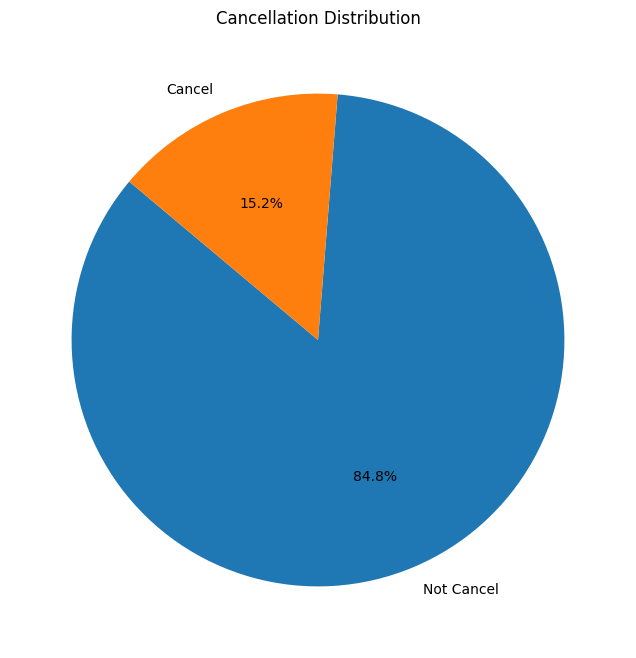

In [31]:
# Creating Pie Chart

counts = [85701, 15315]
labels = ['Not Cancel', 'Cancel']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Cancellation Distribution')
plt.show()


### 10 Most Departure Cities

In [32]:
from_count = df[df['Cancel']==0].groupby(['From']).agg(count = ('From', 'count'))
from_sort = from_count.sort_values(by='count', ascending=False).reset_index().head(10)
from_sort

,From,count
0,تهران,24931
1,مشهد,9218
2,اصفهان,8108
3,شیراز,5594
4,یزد,3121
5,مشهد (خراسان ),2681
6,قم,2528
7,کرمان,2398
8,اهواز,2386
9,بندرعباس,1836


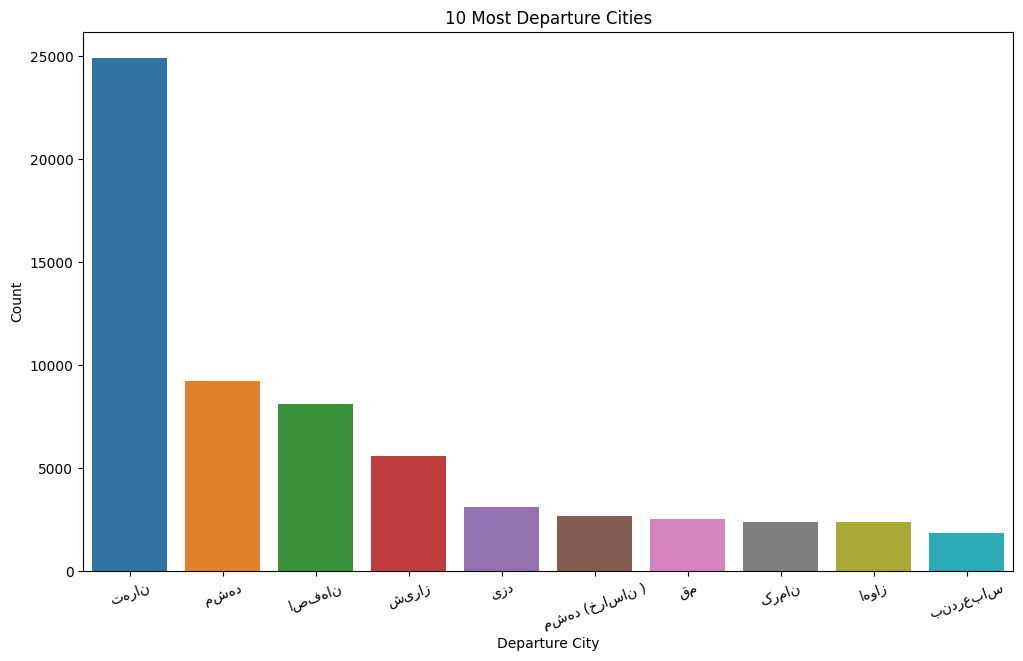

In [33]:
#Bar Plot for  Top 10 City
plt.figure(figsize=(12,7))
sns.barplot(data=from_sort,x='From',y='count')
plt.title('10 Most Departure Cities')
plt.xlabel('Departure City')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.show()

10 Most Departure Cities:

* تهران = Tehran
* مشهد = Mashhad
* اصفهان = Isfahan
* شیراز = Shiraz
* یزد = Yazd
* مشهد (خراسان ) = Mashhad(Greater Khorasan)
* اهواز = Ahvaz
* کرمان = Kerman
* قم = Qom
* بندرعباس = Bandar Abbas

### 10 Most Destination Cities

In [34]:
To_count = df[df['Cancel']==0].groupby(['To']).agg(count = ('To', 'count'))
To_sort = To_count.sort_values(by='count', ascending=False).reset_index().head(10)
To_sort

,To,count
0,تهران,24862
1,مشهد,10902
2,اصفهان,5947
3,شیراز,4284
4,یزد,3115
5,قم,2970
6,مشهد (خراسان ),2515
7,اهواز,2061
8,تبریز,1965
9,کرمان,1938


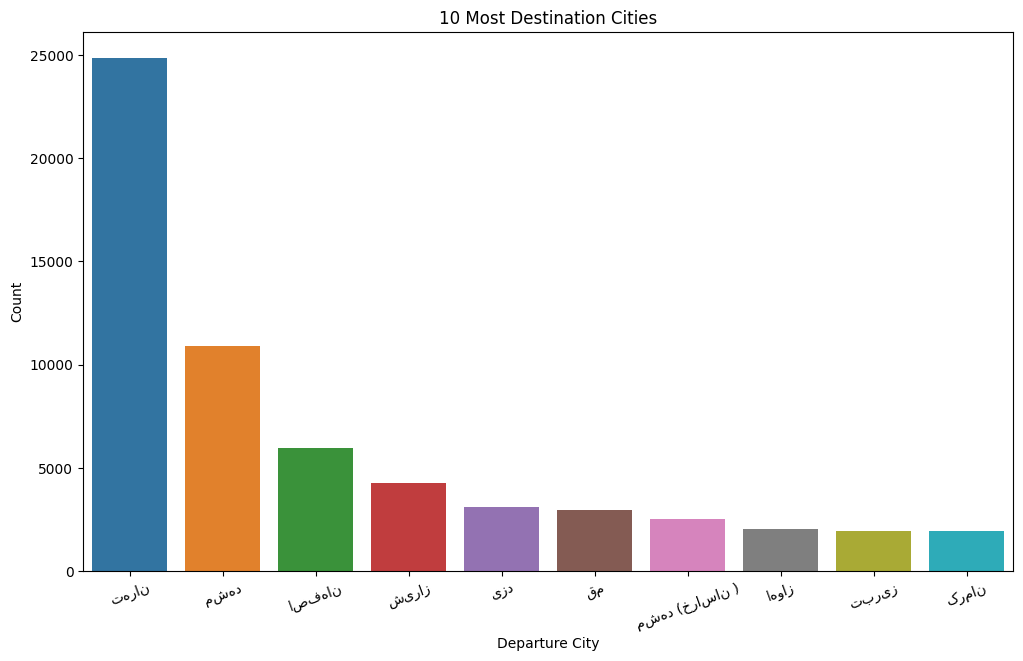

In [35]:
#Bar Plot for  Top 10 City
plt.figure(figsize=(12,7))
sns.barplot(data=To_sort,x='To',y='count')
plt.title('10 Most Destination Cities')
plt.xlabel('Departure City')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.show()

10 Most Destination Cities:

* 'تهران': 'Tehran'
* 'مشهد': 'Mashhad'
* 'اصفهان': 'Isfahan'
* 'شیراز': 'Shiraz'
* 'یزد': 'Yazd',
* 'قم': 'Qom'
* 'مشهد (خراسان )'
* 'Mashhad (Khorasan)'
* 'اهواز': 'Ahvaz'
* 'تبریز': 'Tabriz'
* 'کرمان': 'Kerman'

In [36]:
#weekly income from selling ticket, ignoring cancellation
df['Created'] = pd.to_datetime(df['Created'])

#group by week per month, sum of prices - coupon discount
monthly_income = (
    df.resample('M', on='Created')
    .agg({'Price': 'sum', 'CouponDiscount': 'sum'})
    .reset_index()
)

# Calculate the difference and create a new column 'Income'
monthly_income['Income'] = monthly_income['Price'] - monthly_income['CouponDiscount']
monthly_income

,Created,Price,CouponDiscount,Income
0,2022-01-31,56563160,182200,56380960
1,2022-02-28,11345612332,16906716,11328705616
2,2022-03-31,15633303828,16710531,15616593297
3,2022-04-30,17367007919,25105835,17341902084
4,2022-05-31,27308172059,58275441,27249896618
5,2022-06-30,25986251631,42767365,25943484266
6,2022-07-31,42928829133,48719510,42880109623
7,2022-08-31,66258796089,105117841,66153678248
8,2022-09-30,59408044295,91093348,59316950947
9,2022-10-31,53524825765,73835308,53450990457


In [37]:
#group by month, sum of prices - coupon discount
monthly_income_2 = (
    df[df['Cancel']==0].resample('M', on='Created')
    .agg({'Price': 'sum', 'CouponDiscount': 'sum'})
    .reset_index()
)

# Calculate the difference and create a new column 'Income'
monthly_income_2['Income'] = monthly_income_2['Price'] - monthly_income_2['CouponDiscount']
monthly_income_2

,Created,Price,CouponDiscount,Income
0,2022-01-31,48030660,182200,47848460
1,2022-02-28,9816977111,14868466,9802108645
2,2022-03-31,13687163662,15521188,13671642474
3,2022-04-30,15452403686,23159841,15429243845
4,2022-05-31,23543337879,50318960,23493018919
5,2022-06-30,23036205531,37265947,22998939584
6,2022-07-31,37143003703,42450620,37100553083
7,2022-08-31,55730866243,82283137,55648583106
8,2022-09-30,48321210172,76479535,48244730637
9,2022-10-31,46921887461,63847085,46858040376


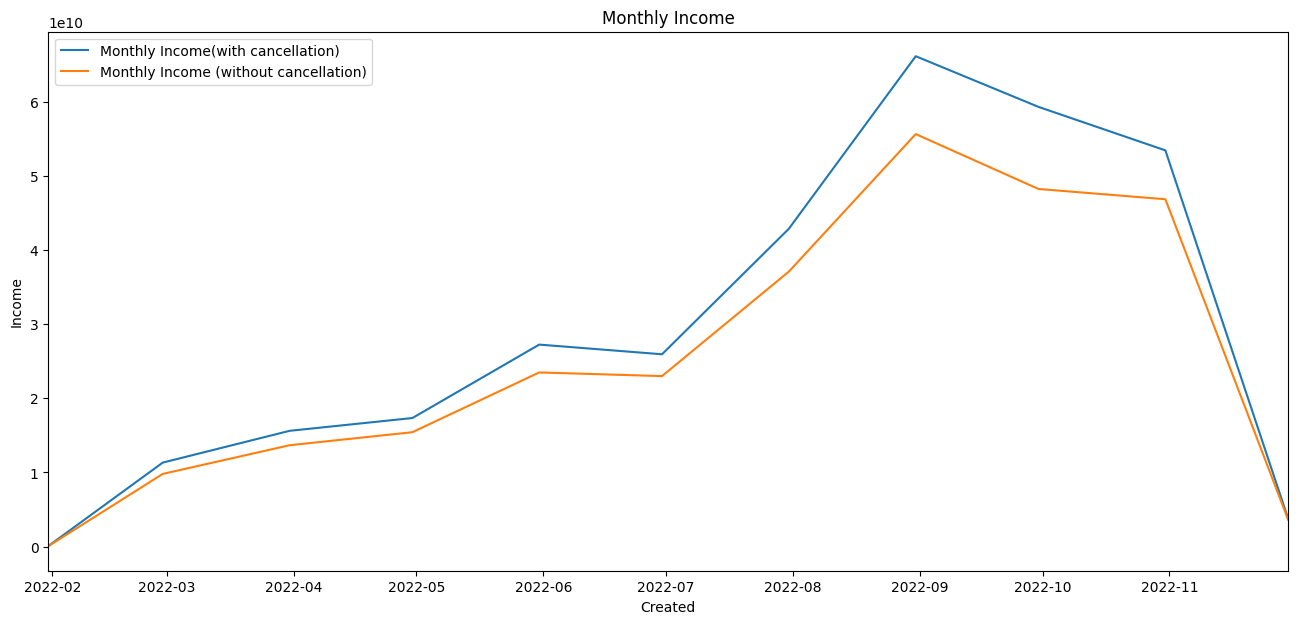

In [38]:
plt.figure(figsize=(16, 7))

# Plot the first line plot
sns.lineplot(data=monthly_income, x='Created', y='Income', label='Monthly Income(with cancellation)')
# Plot the second line plot on the same axes
sns.lineplot(data=monthly_income_2, x='Created', y='Income', label='Monthly Income (without cancellation)')

plt.title('Monthly Income')
plt.xlim(monthly_income['Created'].min(), monthly_income['Created'].max())
plt.legend()
plt.show()

### Trip Reason And Cancellation

<Axes: xlabel='TripReason', ylabel='count'>

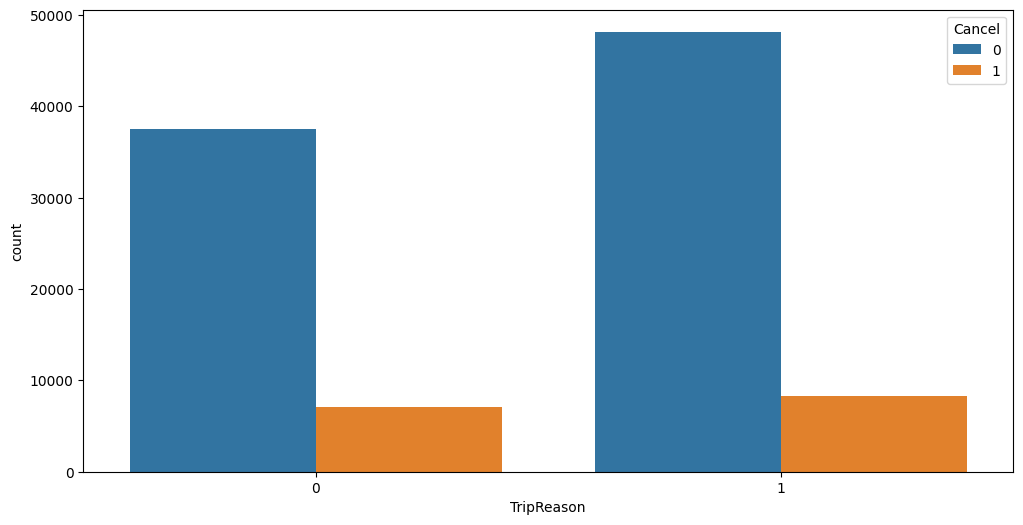

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='TripReason',hue='Cancel')

### Vehicle And TripReason

Text(0.5, 1.0, 'Vehicle and Trip Reason')

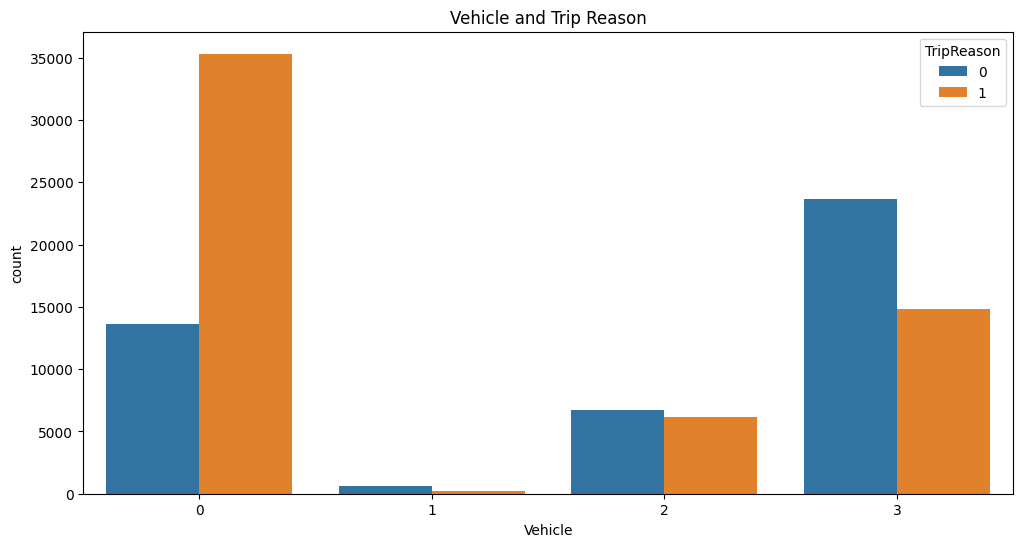

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Vehicle',hue='TripReason')
plt.title('Vehicle and Trip Reason')

* 0-Bus
* 1-International Plane
* 2-Plane
* 3-Train

# Data Preprocessing

In [41]:
df.head(5)

,Created,DepartureTime,ReserveStatus,Gender,Price,CouponDiscount,From,To,Domestic,TripReason,Vehicle,Cancel,From_encoded,To_encoded
0,2022-10-23 09:38:49.110,2022-11-02 23:59:00,5,1,6600000,34425,گرگان,تهران,1,1,2,0,307,85
1,2022-08-15 14:51:43.160,2022-08-18 04:15:00,5,1,9500000,0,مشهد,تهران,1,0,2,0,234,85
2,2022-09-20 17:25:27.250,2022-09-21 11:00:00,3,0,2000000,0,شیراز,اهواز,1,1,0,0,182,41
3,2022-06-25 11:32:53.980,2022-06-26 08:30:00,2,0,40000,0,تبریز,جلفا,1,0,3,0,79,90
4,2022-06-01 11:30:53.633,2022-06-02 23:00:00,3,1,1130000,0,تهران,نجف آباد (اصفهان ),1,0,0,0,85,256


## One-Hot Coding

In [42]:
df1 = pd.get_dummies(df,columns=['Vehicle','ReserveStatus'],prefix=['Vehicle','ReserveStatus'],drop_first=True,dtype=int)

* 0-Bus
* 1-International Plane
* 2-Plane
* 3-Train

In [43]:
df1.head()

,Created,DepartureTime,Gender,Price,CouponDiscount,From,To,Domestic,TripReason,Cancel,From_encoded,To_encoded,Vehicle_1,Vehicle_2,Vehicle_3,ReserveStatus_3,ReserveStatus_4,ReserveStatus_5
0,2022-10-23 09:38:49.110,2022-11-02 23:59:00,1,6600000,34425,گرگان,تهران,1,1,0,307,85,0,1,0,0,0,1
1,2022-08-15 14:51:43.160,2022-08-18 04:15:00,1,9500000,0,مشهد,تهران,1,0,0,234,85,0,1,0,0,0,1
2,2022-09-20 17:25:27.250,2022-09-21 11:00:00,0,2000000,0,شیراز,اهواز,1,1,0,182,41,0,0,0,1,0,0
3,2022-06-25 11:32:53.980,2022-06-26 08:30:00,0,40000,0,تبریز,جلفا,1,0,0,79,90,0,0,1,0,0,0
4,2022-06-01 11:30:53.633,2022-06-02 23:00:00,1,1130000,0,تهران,نجف آباد (اصفهان ),1,0,0,85,256,0,0,0,1,0,0


## Imbalanced Data Handling

In [44]:
df['Cancel'].value_counts() 
# So we can see data is imbalanced  we have to do UnderSampling Method because We want to focus on Cancellation(1) of ticket

Cancel
0    85701
1    15315
Name: count, dtype: int64

In [45]:
X = df1.drop(columns='Cancel', axis=1)
y = df1['Cancel']

X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X,y)

In [46]:
# combining Our Data
df_undersampling = pd.concat([X_under, y_under], axis=1)
df_undersampling.head()

,Created,DepartureTime,Gender,Price,CouponDiscount,From,To,Domestic,TripReason,From_encoded,To_encoded,Vehicle_1,Vehicle_2,Vehicle_3,ReserveStatus_3,ReserveStatus_4,ReserveStatus_5,Cancel
2699,2022-05-29 12:48:07.287,2022-06-02 16:00:00,1,1000000,0,یزد,اصفهان,1,1,318,35,0,0,0,1,0,0,0
11378,2022-09-27 11:28:25.587,2022-10-03 11:05:00,0,14061000,140610,مشهد,بندرعباس,1,0,234,69,0,1,0,0,0,1,0
21956,2022-06-12 12:21:59.570,2022-06-12 22:00:00,1,1690000,0,بوکان,تهران,1,1,75,85,0,0,0,1,0,0,0
92064,2022-08-08 20:31:51.613,2022-08-31 15:25:00,0,1173500,0,تهران,مشهد,1,0,85,234,0,0,1,0,0,0,0
95402,2022-09-27 11:49:40.867,2022-09-28 14:50:00,1,9289000,0,تهران,شیراز,1,1,85,182,0,1,0,0,0,1,0


In [47]:
df_undersampling['Cancel'].value_counts() # Data Is now Balanced

Cancel
0    15315
1    15315
Name: count, dtype: int64

# Data Modelling

## Spliting The Data

In [48]:
cols = ['Cancel','From','To','Created','DepartureTime']
X = df_undersampling.drop(columns = cols)
y = df_undersampling['Cancel']

## SCALING DATA

In [49]:
# Scaling the DATA 
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [50]:
# First splitting:
X_train, X_test, y_train,y_test = train_test_split(X_std, y, test_size=0.20, random_state=42)

In [51]:
X_train

array([[-1.26227778, -0.03264353, -0.10606657, ..., -0.57038839,
         1.82079655, -0.71611222],
       [-1.26227778,  0.59480612, -0.10606657, ..., -0.57038839,
        -0.54921018,  1.39642918],
       [ 0.79221865, -0.22499132, -0.10606657, ..., -0.57038839,
        -0.54921018,  1.39642918],
       ...,
       [-1.26227778, -0.39074441, -0.10606657, ..., -0.57038839,
        -0.54921018, -0.71611222],
       [ 0.79221865, -0.27988157, -0.10606657, ..., -0.57038839,
        -0.54921018,  1.39642918],
       [-1.26227778, -0.20952928, -0.10606657, ..., -0.57038839,
        -0.54921018,  1.39642918]])

## Decision Tree

In [52]:
# decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Training the classifier on the training data
dt.fit(X_train, y_train)

# Making predictions on the test set
y_pred = dt.predict(X_test)

In [53]:
# Evaluating the performance using a classification report
clf_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(clf_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3116
           1       0.94      0.94      0.94      3010

    accuracy                           0.94      6126
   macro avg       0.94      0.94      0.94      6126
weighted avg       0.94      0.94      0.94      6126



## Random Forest

In [54]:
RF=RandomForestClassifier(random_state=42)

# Training the classifier on the training data
RF.fit(X_train, y_train)

# Making predictions on the test set
Rf_y_pred = RF.predict(X_test)

In [55]:
# Evaluating the performance using a classification report
Rf_clf_rep = classification_report(y_test, Rf_y_pred)
print("Classification Report:")
print(Rf_clf_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3116
           1       0.94      0.94      0.94      3010

    accuracy                           0.94      6126
   macro avg       0.94      0.94      0.94      6126
weighted avg       0.94      0.94      0.94      6126



## KNN

In [56]:
KNN=KNeighborsClassifier()

# Training the classifier on the training data
KNN.fit(X_train, y_train)

# Making predictions on the test set
KNN_y_pred = KNN.predict(X_test)

In [57]:
# Evaluating the performance using a classification report
KNN_clf_rep = classification_report(y_test, KNN_y_pred)
print("Classification Report:")
print(KNN_clf_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3116
           1       0.93      0.95      0.94      3010

    accuracy                           0.94      6126
   macro avg       0.94      0.94      0.94      6126
weighted avg       0.94      0.94      0.94      6126



## XGBClassifier

In [58]:
Xg=XGBClassifier()

# Training the classifier on the training data
Xg.fit(X_train, y_train)

# Making predictions on the test set
Xg_y_pred =Xg.predict(X_test)

In [59]:
# Evaluating the performance using a classification report
Xg_clf_rep = classification_report(y_test, Xg_y_pred)
print("Classification Report:")
print(Xg_clf_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3116
           1       0.94      0.94      0.94      3010

    accuracy                           0.94      6126
   macro avg       0.94      0.94      0.94      6126
weighted avg       0.94      0.94      0.94      6126



## Hyperparameter tuning

### Decision Tree

In [66]:
param_grid = {
    'max_depth': [25,26,30],
    'criterion': ['gini', 'entropy', 'log_loss']
}


# Create a GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='recall')

grid_search.fit(X_train,y_train)

print("Best Parameter",grid_search.best_params_)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the model on the test set
test_accuracy = best_dt_model.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Best Parameter {'criterion': 'entropy', 'max_depth': 30}
Test Accuracy: 93.91%


In [74]:
dt_y_pred = best_dt_model.predict(X_test)
# Generate confusion matrix
cm = confusion_matrix(y_test, dt_y_pred)
print("--confusion Matrix-- \n",cm)

--confusion Matrix-- 
 [[2924  192]
 [ 181 2829]]


### Random Forest

In [75]:
param_grid = {
    'n_estimators': (10,20,30),
    'max_depth':(30,35,40,45),
    'min_samples_split': [10,11,12],
    'min_samples_leaf': [5,6,7]
}



# Create a GridSearchCV object
grid_search = GridSearchCV(RF, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train,y_train)

print("Best Parameter",grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test set
test_accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Best Parameter {'max_depth': 30, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 20}
Test Accuracy: 94.52%


In [76]:
rf_y_pred = best_rf_model.predict(X_test)
# Generate confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)
print("--confusion Matrix-- \n",cm)

--confusion Matrix-- 
 [[2987  129]
 [ 207 2803]]


### XgBoost

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [300,400,500],
    'max_depth': [10,20,30,40,50,60],
}



# Create a GridSearchCV object
grid_search = GridSearchCV(Xg, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train,y_train)

print("Best Parameter",grid_search.best_params_)

# Get the best model
best_xg_model = grid_search.best_estimator_

# Evaluate the model on the test set
test_accuracy = best_xg_model.score(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

In [ ]:
xg_y_pred = best_xg_model.predict(X_test)
# Generate confusion matrix
cm = confusion_matrix(y_test, xg_y_pred)
print("--confusion Matrix-- \n",cm)

# Conclusion

### **Project Summary:**

This project successfully addressed the task of predicting flight ticket cancellations using a machine learning approach. The key steps involved data preprocessing, feature engineering, model training and evaluation, and hyperparameter tuning.

### **Data Preprocessing**:
* The code effectively cleaned and prepared the data for analysis.
* One-Hot Encoding was used to handle categorical variables like ***Vehicle*** and ***ReserveStatus***.
* Undersampling was employed to balance the target variable (***Cancel***) as it had a significant class imbalance.

### **Data Modeling:**

* The code effectively split the data into training and testing sets for model evaluation.
* Feature scaling was implemented using StandardScaler to ensure all features were on a similar scale.
* Several machine learning models were trained and evaluated:
    * Decision Tree Classifier
    * Random Forest Classifier
    * K-Nearest Neighbors Classifier
    * XGBoost Classifier
* Hyperparameter tuning was performed on Decision Tree and Random Forest models to optimize their performance.

### **Results:**

* All models achieved high accuracy in predicting flight cancellations (around **94%**).
* Random Forest achieved the highest test accuracy (**94.52%**) after hyperparameter tuning.

### **Overall:**

The project demonstrates a robust approach to building a machine learning model for flight cancellation prediction. The findings contribute to a better understanding of factors influencing cancellations, enabling airlines to potentially improve their operations and reduce losses.